In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


(449, 513)


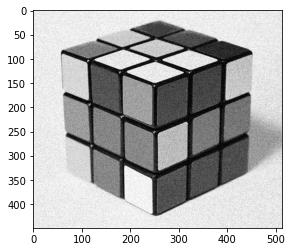

In [2]:
path = "../img/rubiks_cube.png"
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
plt.imshow(img, "gray")
print(img.shape)

In [3]:
k_size = int(input("Enter kernel Size: "))//2
sigma = 0.3*((k_size-1)*0.5-1)+0.8
sigma = sigma*3
print(sigma)

1.9500000000000002


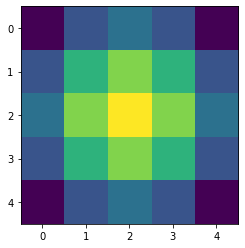

In [4]:
gf = np.zeros((2*k_size+1, 2*k_size+1), dtype="float64")

for i in range(-k_size, k_size+1):
    for j in range (-k_size, k_size+1):
        gf[i+k_size][j+k_size]=np.exp(-(pow(i,2)+pow(j,2))/(2*pow(sigma,2)))
plt.imshow(gf)

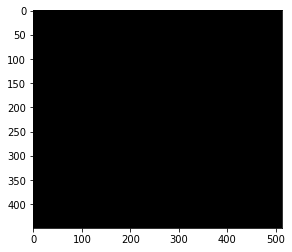

In [5]:
output = np.zeros((img.shape[0], img.shape[1]), dtype="float32")
plt.imshow(output, "gray")

(453, 517)


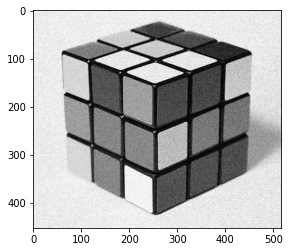

In [6]:
mimg = cv.copyMakeBorder(img, k_size,k_size,k_size, k_size, cv.BORDER_REPLICATE)
plt.imshow(mimg, "gray")
print(mimg.shape)

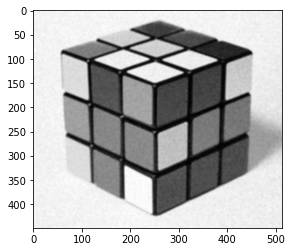

In [7]:
for i in range(2*k_size, mimg.shape[0]):
    for j in range(2*k_size,mimg.shape[1]):
        sum = 0
        for p in range(-k_size, k_size+1):
            for q in range(-k_size, k_size+1):
                sum+=mimg[i-(p+k_size)][j-(q+k_size)]*gf[p+k_size][q+k_size]
        output[i-(2*k_size)][j-(2*k_size)] = sum
plt.imshow(output, "gray")
    

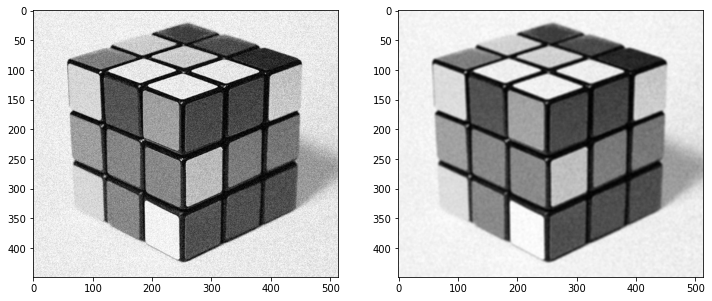

In [8]:
figure , (ax1, ax2) = plt.subplots(1,2, figsize=(12,12))
ax1.imshow(img, "gray")
ax2.imshow(output, "gray")